In [101]:
import pandas as pd
import numpy as np


In [102]:
import warnings
warnings.filterwarnings("ignore")

In [103]:
np.random.seed(42)
def createdata():
    data={
        'Age':np.random.randint(18,70,size=20),
        'Salary':np.random.randint(12000,30000,size=20),
        'Purchased':np.random.choice([0,1],size=20),
        'Gender':np.random.choice(['Male','Female'],size=20),
        'City':np.random.choice(['New York','San Francisco','Los Angles'],size=20)
    }
    df=pd.DataFrame(data)
    return df
df=createdata()
df.head(5)

,Age,Salary,Purchased,Gender,City
0,56,14433,1,Female,San Francisco
1,69,17311,1,Female,Los Angles
2,46,17051,1,Female,Los Angles
3,32,18420,1,Female,San Francisco
4,60,29568,0,Female,Los Angles


In [104]:
df.loc[3,'Age'] = np.nan
df.loc[1,'Salary'] = np.nan
df.head(5)

,Age,Salary,Purchased,Gender,City
0,56.0,14433.0,1,Female,San Francisco
1,69.0,NaN,1,Female,Los Angles
2,46.0,17051.0,1,Female,Los Angles
3,NaN,18420.0,1,Female,San Francisco
4,60.0,29568.0,0,Female,Los Angles


In [105]:
df['Age'].fillna(df['Age'].mean(), inplace=True) 
df['Salary'].fillna(df['Salary'].median(), inplace=True)  

print(df)

          Age   Salary  Purchased  Gender           City
0   56.000000  14433.0          1  Female  San Francisco
1   69.000000  18396.0          1  Female     Los Angles
2   46.000000  17051.0          1  Female     Los Angles
3   41.736842  18420.0          1  Female  San Francisco
4   60.000000  29568.0          0  Female     Los Angles
5   25.000000  18396.0          1  Female       New York
6   38.000000  20666.0          0  Female  San Francisco
7   56.000000  14747.0          1  Female       New York
8   36.000000  12189.0          1  Female       New York
9   40.000000  15005.0          1  Female  San Francisco
10  28.000000  13899.0          0  Female     Los Angles
11  28.000000  13267.0          1    Male       New York
12  41.000000  29912.0          0    Male  San Francisco
13  53.000000  23394.0          1  Female       New York
14  57.000000  15556.0          0  Female       New York
15  41.000000  15890.0          1  Female       New York
16  20.000000  20838.0         

In [106]:
df_dropped=df.dropna()
df_dropped.head(5)

,Age,Salary,Purchased,Gender,City
0,56.000000,14433.0,1,Female,San Francisco
1,69.000000,18396.0,1,Female,Los Angles
2,46.000000,17051.0,1,Female,Los Angles
3,41.736842,18420.0,1,Female,San Francisco
4,60.000000,29568.0,0,Female,Los Angles


In [107]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=3)
df[['Age','Salary']] = knn_imputer.fit_transform(df[['Age', 'Salary']])

In [108]:
df['Age_miss']=df['Age'].isnull().astype(int)
df.head(5

,Age,Salary,Purchased,Gender,City,Age_miss
0,56.000000,14433.0,1,Female,San Francisco,0
1,69.000000,18396.0,1,Female,Los Angles,0
2,46.000000,17051.0,1,Female,Los Angles,0
3,41.736842,18420.0,1,Female,San Francisco,0
4,60.000000,29568.0,0,Female,Los Angles,0


In [113]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['Gender']=label_encoder.fit_transform(df['Gender'])
df.head()

,Age,Salary,Purchased,Gender,City,Age_miss
0,56.000000,14433.0,1,0,San Francisco,0
1,69.000000,18396.0,1,0,Los Angles,0
2,46.000000,17051.0,1,0,Los Angles,0
3,41.736842,18420.0,1,0,San Francisco,0
4,60.000000,29568.0,0,0,Los Angles,0


In [68]:
import pandas as pd
from statistics import mode

data = {
    'A': [1, 2, None, 4, 5],
    'B': [3, None, None, 8, 10],
    'C': ['cat', None, 'dog', 'dog', None]
}

df = pd.DataFrame(data)
df


,A,B,C
0,1.0,3.0,cat
1,2.0,NaN,None
2,NaN,NaN,dog
3,4.0,8.0,dog
4,5.0,10.0,None


In [69]:
df['A'].fillna(df['A'].mean(), inplace=True)
df['B'].fillna(df['B'].median(), inplace=True)
df['C'].fillna(mode(df['C'].dropna()), inplace=True)

print(df)

     A     B    C
0  1.0   3.0  cat
1  2.0   8.0  dog
2  3.0   8.0  dog
3  4.0   8.0  dog
4  5.0  10.0  dog


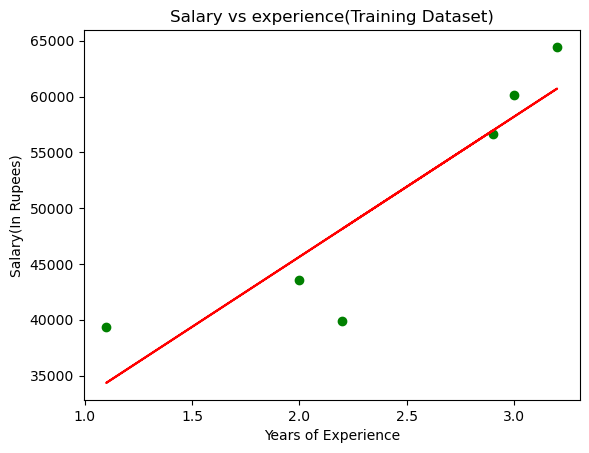

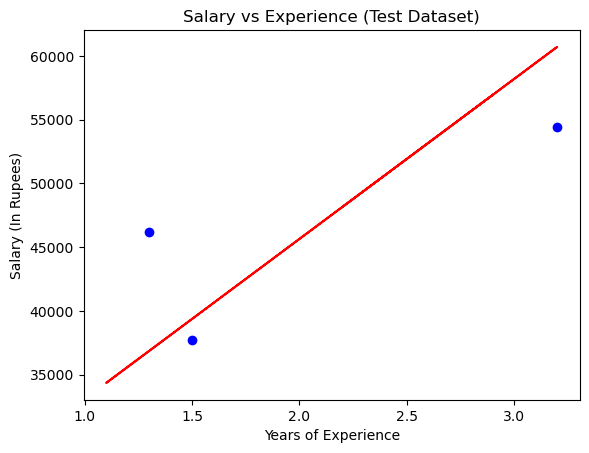

In [70]:
import numpy as np
import matplotlib.pyplot as mtp
import pandas as pd
data_set = pd.read_csv('Salary_data.csv')
x = data_set.iloc[:,:-1].values
y = data_set.iloc[:,1].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 1/4,random_state = 0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)
x_pred = regressor.predict(x_train)
mtp.scatter(x_train,y_train,color = "green")
mtp.plot(x_train,x_pred,color = "red")
mtp.title("Salary vs experience(Training Dataset)")
mtp.xlabel("Years of Experience")
mtp.ylabel("Salary(In Rupees)")
mtp.show()
mtp.scatter(x_test, y_test, color="blue")
mtp.plot(x_train, x_pred, color="red")  
mtp.title("Salary vs Experience (Test Dataset)")
mtp.xlabel("Years of Experience")
mtp.ylabel("Salary (In Rupees)")
mtp.show()